(54, 160, 3)


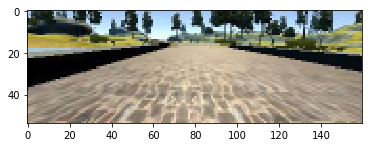

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from math import floor
import numpy as np
%matplotlib inline

#Load driving log:

driving_log = pd.read_csv(
    'driving_log.csv',
    names=['Center','Left','Right','Steering Angle','Throttle','Break','Speed'],
    header=None,
    skiprows=1)

#Load and preprocess images:

def flip_axis(x, axis):
    
    x = np.asarray(x).swapaxes(axis, 0)
    x = x[::-1, ...]
    x = x.swapaxes(0, axis)
    
    return x

def load_image(path):
    image = cv2.imread(path)
    #Lower resolution, still doesn't affect network's performance
    image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
    #Convert to RGB
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #Normalize image
    image = image/255.
    #Crop image, remove sky and the bottom part. Leave some of both for bumpy sections.
    image = image[floor(image.shape[0]*0.2):floor(image.shape[0]*0.88),:,:]
    #Flip image
    image = np.asarray(image)[:,::-1,:]
    
    return image

image = load_image(driving_log['Left'][0].strip())
print (image.shape)
plt.figure()
plt.imshow(image)

#center_images = np.array([load_image(path.strip()) for path in driving_log['Center']], dtype=np.float32)
#left_images = np.array([load_image(path.strip()) for path in driving_log['Left']], dtype=np.float32)
#right_images = np.array([load_image(path.strip()) for path in driving_log['Right']], dtype=np.float32)